In [28]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
file_path = 'Dataset/Charging_Data.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')
print(df.columns)

Index(['UserID', 'Charging Post ID', 'Location Information', 'District Name',
       'Order creation time', 'Transaction power/kwh', 'Electricity cost/Yuan',
       'Service charge/Yuan', 'Transaction Amount/Yuan', 'Actual Payment/Yuan',
       'Start Time', 'End Time', 'Payment time', 'Temperature(¡æ)',
       'Relative Humidity(%)', 'Precipitation(mm)', 'end_cause',
       'is_full_charge', 'is_user_stop', 'is_nonsystem_fault',
       'is_system_issue', 'is_EV_fault', 'is_other_fault', 'is_abnormal'],
      dtype='object')


#### 共有13个充电场站

In [13]:
print( df['Location Information'].unique() )
print(len(
    df['Location Information'].unique()
))

['Tourist Attraction' 'Financial Industrial Park' 'Technology Park'
 'Shopping Mall' 'Park A' 'Industrial Park\t' 'Park B' 'Bus Station'
 'Government Agency' 'Expressway Service District B'
 'Expressway Service District A' 'Expressway Service District C'
 'Wholesale Market']
13


#### 停车时长统计分析

In [ ]:
# 将 Start Time 和 End Time 转换为 datetime 类型
df['Start Time'] = pd.to_datetime(df['Start Time'])
df['End Time']  = pd.to_datetime(df['End Time'])

# 计算时间差
df['Duration'] = (df['End Time'] - df['Start Time']).dt.total_seconds() / 3600

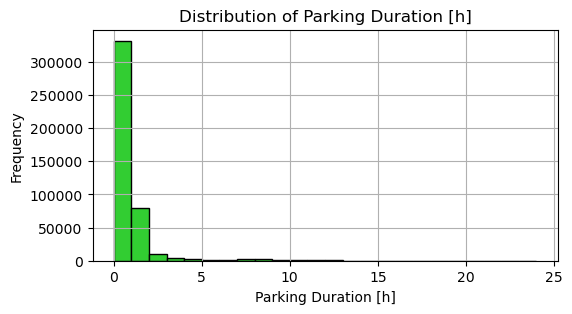

In [49]:
# 计算最小值和最大值
min_value = df['Duration'].min()
max_value = df['Duration'].max()

# 创建自定义的区间边界，以 10 为间隔
bins = np.arange(min_value, max_value + 1, 1)
plt.figure(figsize=(6,3))
plt.hist(df['Duration'], bins=bins, color='#32CD32', edgecolor='black')
plt.title('Distribution of Parking Duration [h]')
plt.xlabel('Parking Duration [h]')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

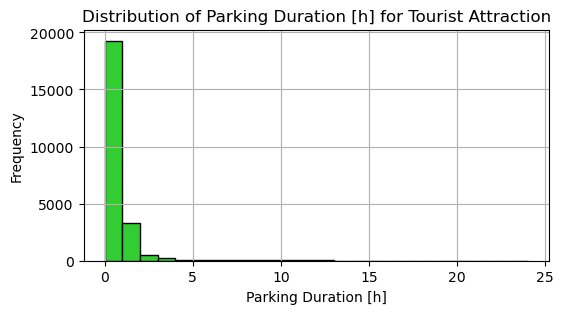

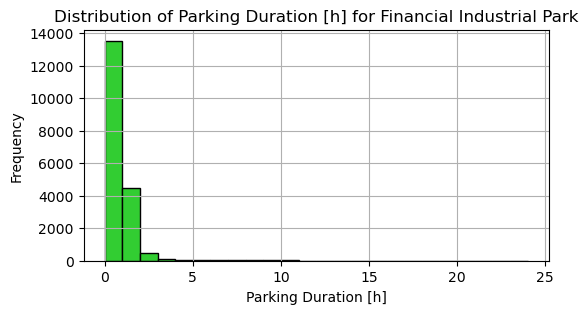

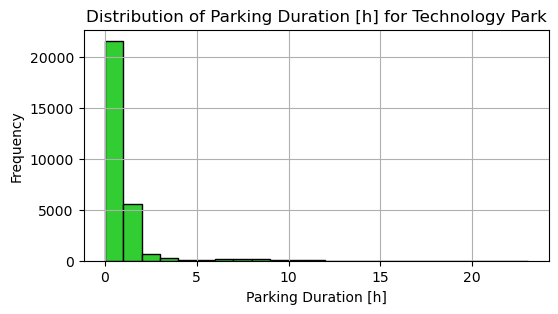

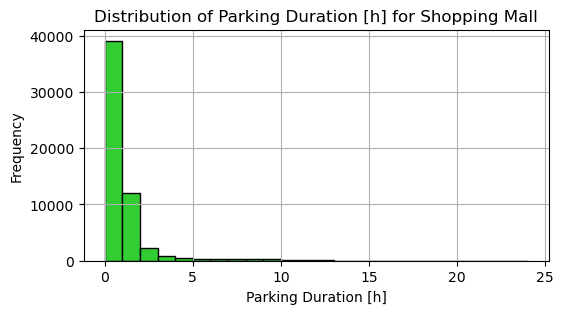

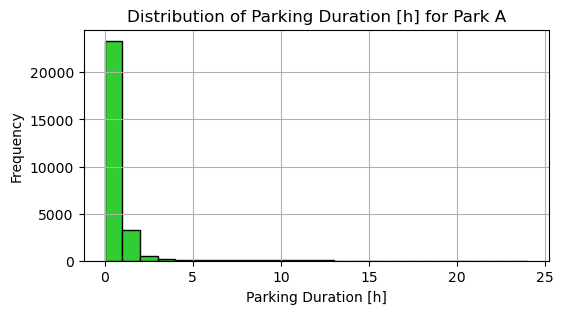

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


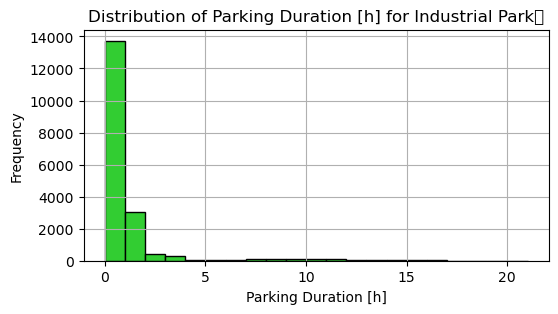

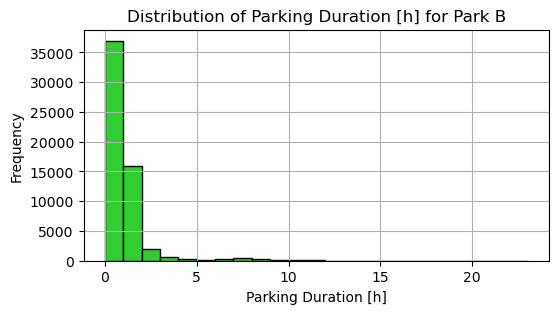

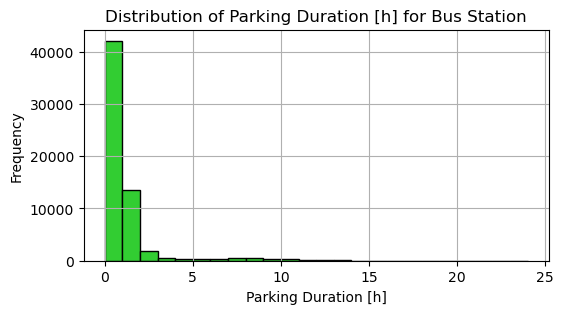

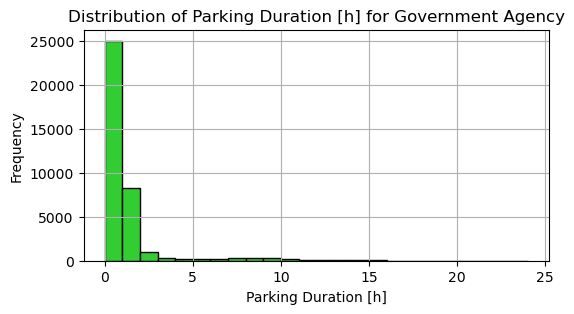

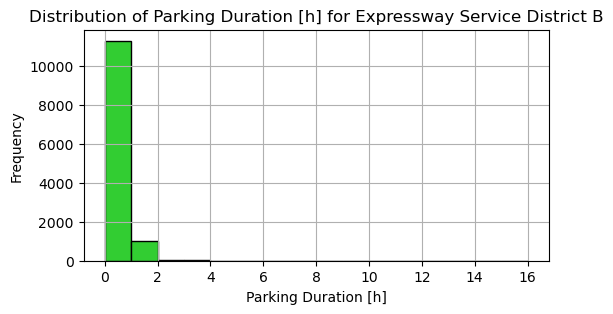

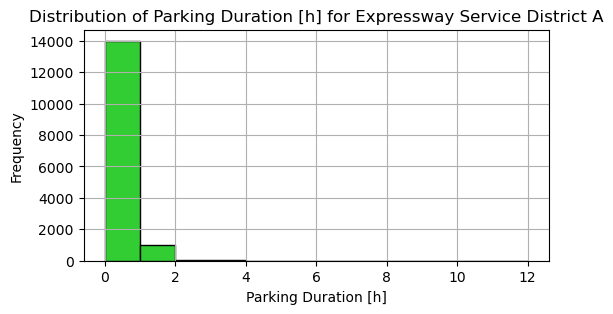

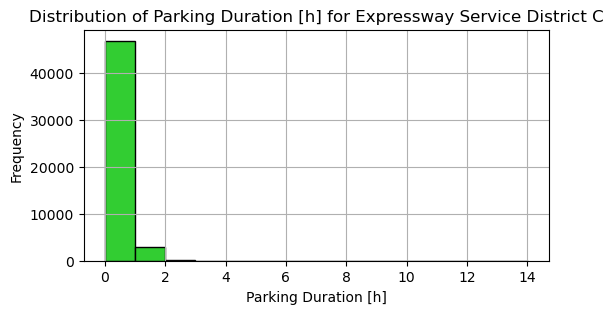

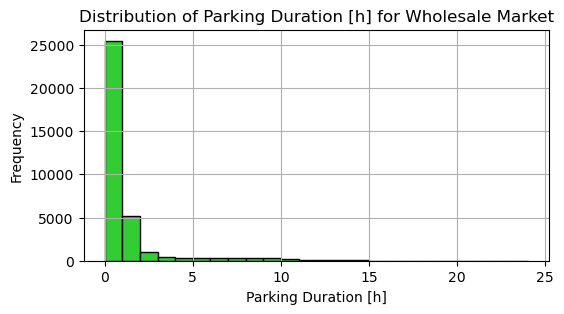

In [62]:
for location in df['Location Information'].unique():
    # 筛选当前位置的数据
    location_df = df[df['Location Information'] == location]

    # 计算最小值和最大值
    min_value = location_df['Duration'].min()
    max_value = location_df['Duration'].max()

    # 创建自定义的区间边界，以 1 小时为间隔
    bins = np.arange(min_value, max_value + 1, 1)

    # 绘制直方图
    plt.figure(figsize=(6,3))
    plt.hist(location_df['Duration'], bins=bins, color='#32CD32', edgecolor='black')
    plt.title(f'Distribution of Parking Duration [h] for {location}')
    plt.xlabel('Parking Duration [h]')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [26]:
df['Charging Power/kW'] = df['Transaction power/kwh']/df['Duration']

In [ ]:
df['Charging Power/kW']

0         30.153020
1         13.863354
2         42.493047
3         24.960000
4         28.476684
            ...    
441072    47.960246
441073    20.032323
441074    25.424378
441075     8.022857
441076    29.134177
Name: Charging Power/kW, Length: 441077, dtype: float64

#### 查看最小和最大充电功率[kW]

In [30]:
print(f"Minimum charging rate [kW]: { df['Charging Power/kW'].min() }")
print(f"Maximun charging rate [kW]: { df['Charging Power/kW'].max() }")

Minimum charging rate [kW]: 0.0
Maximun charging rate [kW]: 146.5


#### 平均充电功率统计分析

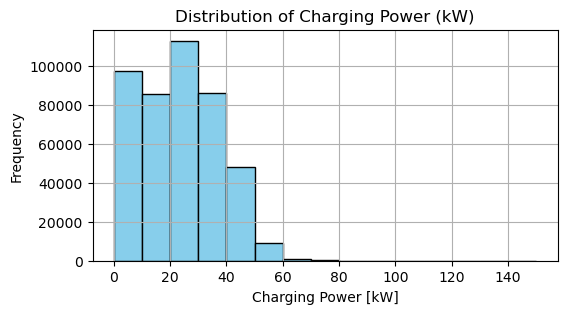

In [41]:
# 计算最小值和最大值
min_value = df['Charging Power/kW'].min()
max_value = df['Charging Power/kW'].max()

# 创建自定义的区间边界，以 10 为间隔
bins = np.arange(min_value, max_value + 10, 10)
plt.figure(figsize=(6,3))
plt.hist(df['Charging Power/kW'], bins=bins, color='skyblue', edgecolor='black')
plt.title('Distribution of Charging Power (kW)')
plt.xlabel('Charging Power [kW]')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### 13个站点数据统计分析

In [58]:
location_charging_sessions = df['Location Information'].value_counts()/len(df) * 100
# 格式化为百分比并保留两位小数
location_charging_sessions = location_charging_sessions.apply(lambda x: f"{x:.2f} %")

# 打印结果
print(location_charging_sessions)

Location Information
Bus Station                      13.79 %
Park B                           12.99 %
Shopping Mall                    12.83 %
Expressway Service District C    11.38 %
Government Agency                 8.29 %
Wholesale Market                  7.82 %
Technology Park                   6.54 %
Park A                            6.31 %
Tourist Attraction                5.36 %
Financial Industrial Park         4.29 %
Industrial Park\t                 4.16 %
Expressway Service District A     3.42 %
Expressway Service District B     2.81 %
Name: count, dtype: object
